## Evaluation of locations scraped from Flickr

In [1]:
import math

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [5]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [4]:
istanbul = [41.005512, 28.997460] 

In [6]:
coords = []
with open('Istanbullocations_01_latlong.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    for r in reader:
        coords.append([eval(r[0]), eval(r[1])])

In [7]:
coords

[[40.947054, 29.109467],
 [41.053466, 28.965797],
 [41.024463, 28.967514],
 [41.021031, 28.965797],
 [41.021031, 28.965797],
 [41.021031, 28.965797],
 [41.021031, 28.965797],
 [41.021031, 28.965797],
 [41.024463, 28.967514],
 [41.021031, 28.965797],
 [41.021031, 28.965797],
 [41.021031, 28.965797],
 [41.021355, 28.9888],
 [41.021873, 28.976783],
 [41.021873, 28.976783],
 [41.021873, 28.976783],
 [41.021873, 28.976783],
 [41.029772, 29.018669],
 [41.029772, 29.018669],
 [41.029772, 29.018669],
 [41.063303, 28.948974],
 [41.046734, 28.932495],
 [41.046734, 28.932495],
 [41.046734, 28.932495],
 [41.046734, 28.932495],
 [41.046734, 28.932495],
 [41.046734, 28.932495],
 [41.046734, 28.932495],
 [41.046734, 28.932495],
 [41.046734, 28.932495],
 [41.029772, 29.018669],
 [41.029772, 29.018669],
 [41.029772, 29.018669],
 [41.029772, 29.018669],
 [41.021873, 28.976783],
 [41.021873, 28.976783],
 [41.021873, 28.976783],
 [41.021873, 28.976783],
 [41.021873, 28.976783],
 [41.029772, 29.018669],
 [

In [9]:
from haversine import haversine, Unit

refmain = istanbul
refsecond = coords[1]

haversine(refmain, refsecond, unit='m')

5957.10087750935

In [10]:
def convertDistToMetre(mainCoord, listofCoords):
    distances = []
    for i in listofCoords:
        distance = haversine(mainCoord, i, unit='m')
        distances.append(distance)
    return distances

In [12]:
distances = convertDistToMetre(istanbul, coords)

In [13]:
distances

[11431.083482663256,
 5957.10087750935,
 3279.2033860317315,
 3167.8809915612337,
 3167.8809915612337,
 3167.8809915612337,
 3167.8809915612337,
 3167.8809915612337,
 3279.2033860317315,
 3167.8809915612337,
 3167.8809915612337,
 3167.8809915612337,
 1905.6245495303583,
 2513.8480844013243,
 2513.8480844013243,
 2513.8480844013243,
 2513.8480844013243,
 3231.59534316065,
 3231.59534316065,
 3231.59534316065,
 7604.831199511485,
 7121.052617157796,
 7121.052617157796,
 7121.052617157796,
 7121.052617157796,
 7121.052617157796,
 7121.052617157796,
 7121.052617157796,
 7121.052617157796,
 7121.052617157796,
 3231.59534316065,
 3231.59534316065,
 3231.59534316065,
 3231.59534316065,
 2513.8480844013243,
 2513.8480844013243,
 2513.8480844013243,
 2513.8480844013243,
 2513.8480844013243,
 3231.59534316065,
 3231.59534316065,
 3231.59534316065,
 3231.59534316065,
 3231.59534316065,
 3231.59534316065,
 3231.59534316065,
 3231.59534316065,
 3231.59534316065,
 3231.59534316065,
 3231.59534316065

In [14]:
def get_bearing(lat1, long1, lat2, long2):
    lat1 = np.deg2rad(lat1)
    lat2 = np.deg2rad(lat2)
    long1 = np.deg2rad(long1)
    long2 = np.deg2rad(long2)
    
    dLon = long2 - long1
    y = math.sin(dLon) * math.cos(lat2)
    x = math.cos(lat1) * math.sin(lat2) - math.sin(lat1) * math.cos(lat2) * math.cos(dLon)
  
    brng = math.atan2(y, x)
    brng = np.rad2deg(brng)
    brng = (brng + 360) % 360

    return brng

In [15]:
get_bearing(istanbul[0], istanbul[1], coords[2][0],coords[2][1])

309.9967489012434

In [16]:
def getListOfBearings(mainCoord,coordinates):
    bearings = []
    for c in coordinates:
        lat = c[0]
        lon = c[1]
        bearing = get_bearing(mainCoord[0],mainCoord[1],lat,lon)
        bearings.append(bearing)
    return bearings

In [17]:
bearings = getListOfBearings(istanbul,coords)

In [18]:
newPoints = []
for i in range(len(bearings)):
    angle = bearings[i]
    distance = distances[i]
    px = distance * math.sin(np.deg2rad(angle))
    py = distance * math.cos(np.deg2rad(angle))
    newPoints.append([px,py])

In [19]:
newPoints

[[9407.172268895278, -6494.211229313717],
 [-2655.002373777116, 5332.73037571379],
 [-2512.1351310424293, 2107.688765056266],
 [-2656.310664595462, 1726.1180810858218],
 [-2656.310664595462, 1726.1180810858218],
 [-2656.310664595462, 1726.1180810858218],
 [-2656.310664595462, 1726.1180810858218],
 [-2656.310664595462, 1726.1180810858218],
 [-2512.1351310424293, 2107.688765056266],
 [-2656.310664595462, 1726.1180810858218],
 [-2656.310664595462, 1726.1180810858218],
 [-2656.310664595462, 1726.1180810858218],
 [-726.511627782376, 1761.6996845290582],
 [-1734.6377223743252, 1819.46809907847],
 [-1734.6377223743252, 1819.46809907847],
 [-1734.6377223743252, 1819.46809907847],
 [-1734.6377223743252, 1819.46809907847],
 [1779.0549533574342, 2697.808728370486],
 [1779.0549533574342, 2697.808728370486],
 [1779.0549533574342, 2697.808728370486],
 [-4065.0348178385157, 6427.203863487129],
 [-5447.994843398186, 4585.710693298986],
 [-5447.994843398186, 4585.710693298986],
 [-5447.994843398186, 45

In [17]:
colours = np.array(colours)

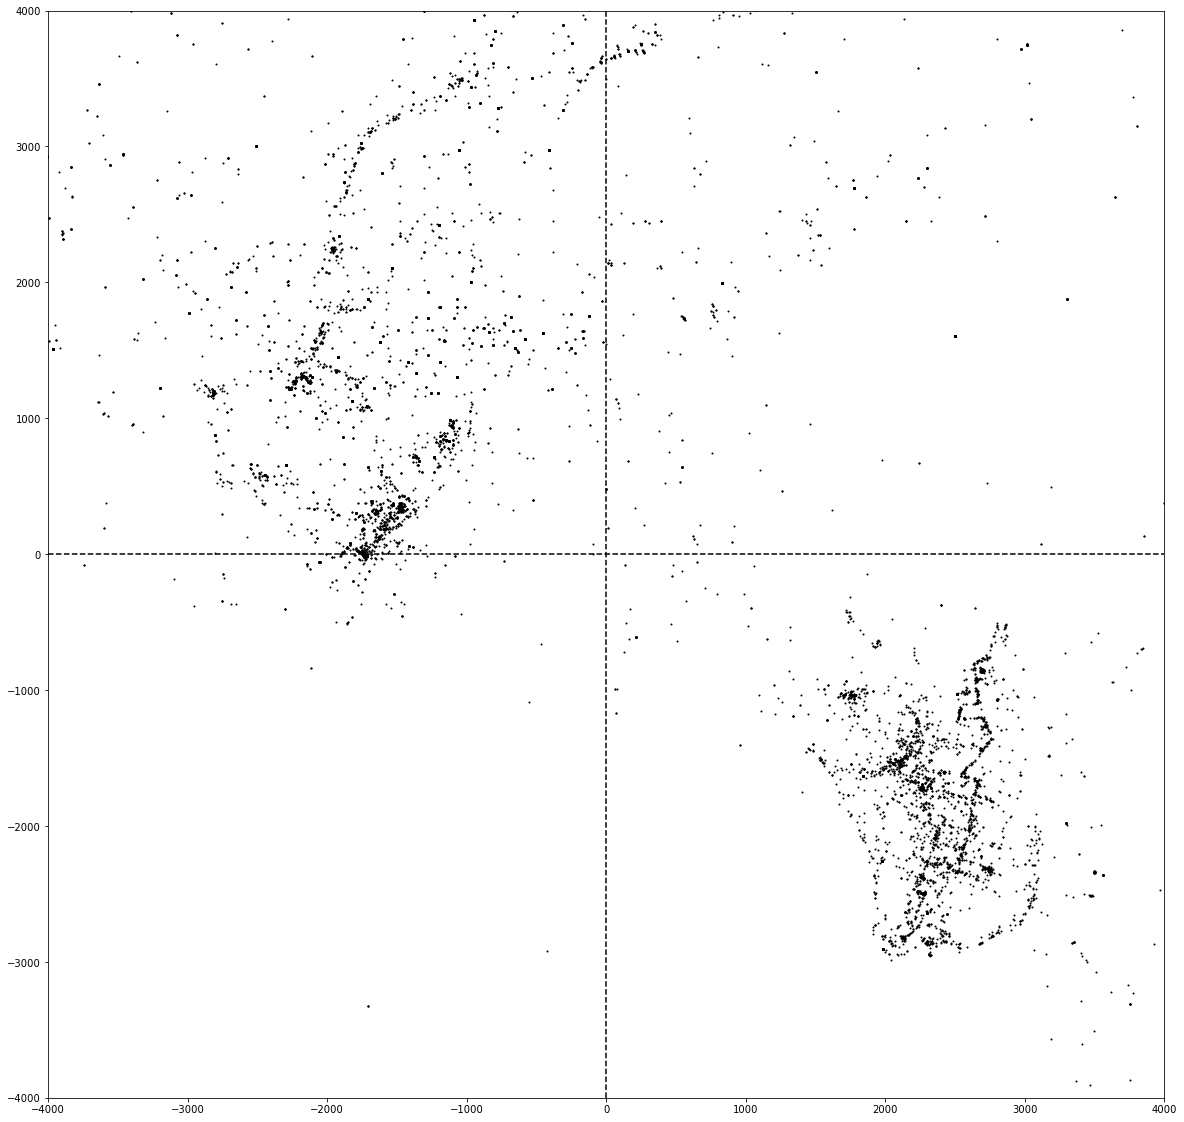

In [30]:
fig, ax = plt.subplots(figsize = (20,20))
ax.scatter([p[0] for p in newPoints], [p[1] for p in newPoints], c = 'black', s = 1)
plt.axvline(0,c= 'black', ls = '--')
plt.axhline(0,c= 'black', ls = '--')

plt.xlim([-4000,4000])
plt.ylim([-4000,4000])

plt.show()

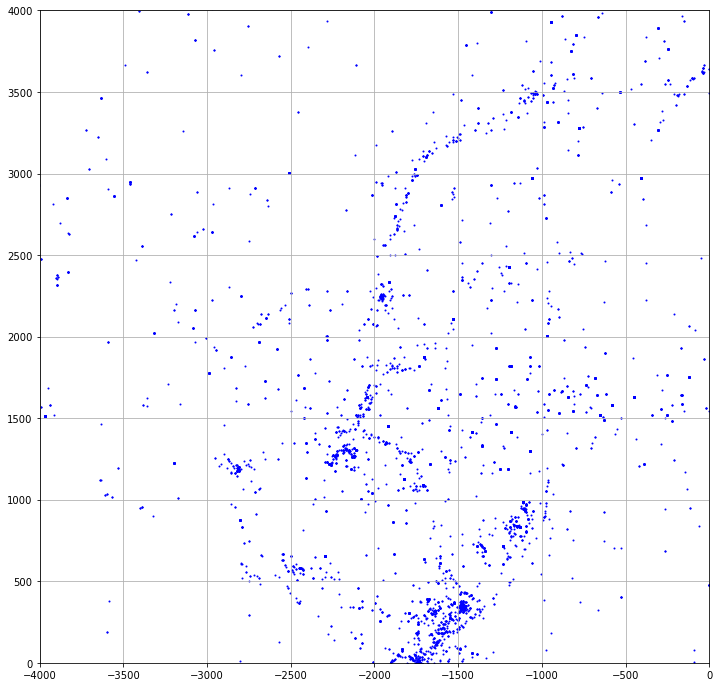

In [32]:
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter([p[0] for p in newPoints], [p[1] for p in newPoints], c = 'b', s = 1)
ax.grid(True)
plt.ylim([0,4000])
plt.xlim([-4000,0])
plt.show()

In [20]:
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [21]:
def testIfUniform(latrange, lonrange, coordinates):
    pointsInRange = []
    for c in coordinates:
        if (latrange[0] <= c[0] and c[0]<latrange[1] and
        lonrange[0] <= c[1] and c[1]<lonrange[1]):
            pointsInRange.append(c)
    pointsInRange = np.asarray(pointsInRange)
    scaler = MinMaxScaler()
    normalised = scaler.fit_transform(pointsInRange)
    print(stats.kstest(normalised[:,0], 'uniform'))
    print(stats.kstest(normalised[:,1], 'uniform'))

In [22]:
testIfUniform([0,500],[0,500], newPoints)

KstestResult(statistic=0.22428618472408596, pvalue=6.393959727957195e-274)
KstestResult(statistic=0.23630116934016732, pvalue=2.1438150567551306e-304)


In [23]:
def testIfUniform(latrange, lonrange, coordinates, statThresh, pThresh):
    pointsInRange = []
    for c in coordinates:
        if (latrange[0] <= c[0] and c[0]<latrange[1] and
        lonrange[0] <= c[1] and c[1]<lonrange[1]):
            pointsInRange.append(c)
    if len(pointsInRange) > 2 and min(latrange[1]-latrange[0], lonrange[1]-lonrange[0]) > 0.00005:
        points = np.asarray(pointsInRange)
        scaler = MinMaxScaler()
        normalised = scaler.fit_transform(pointsInRange)
        
        xKS = stats.kstest(normalised[:,0], 'uniform')
        yKS = stats.kstest(normalised[:,1], 'uniform')
        if xKS[0] < statThresh and yKS[0] < statThresh and xKS[1] > pThresh and yKS[1] > pThresh:
            return True, pointsInRange
        else:
            return False, pointsInRange
    else:
        return True, pointsInRange

In [24]:
def evaluate(latrange, lonrange, coordinates, statThresh = 0.7, pThresh = 0.05):
    uniform, inrange = testIfUniform(latrange, lonrange, coordinates, statThresh, pThresh)
    latdiff = latrange[1]-latrange[0]
    londiff = lonrange[1]-lonrange[0]
    
    if uniform:
        return [(latrange[0], lonrange[0]), (latdiff, londiff), inrange]
    else:
        a = evaluate([latrange[0],latrange[0]+latdiff/2], [lonrange[0],lonrange[0]+londiff/2], inrange, statThresh, pThresh)
        b = evaluate([latrange[0]+latdiff/2,latrange[1]], [lonrange[0],lonrange[0]+londiff/2], inrange, statThresh, pThresh)
        c = evaluate([latrange[0],latrange[0]+latdiff/2], [lonrange[0]+londiff/2,lonrange[1]], inrange, statThresh, pThresh)
        d = evaluate([latrange[0]+latdiff/2,latrange[1]], [lonrange[0]+londiff/2,lonrange[1]], inrange, statThresh, pThresh)
        
        return[a,b,c,d]

In [25]:
def unpack(tree, squares):
    if len(tree) == 4:
        for t in tree:
            unpack(t, squares)
    else:
        squares.append(tree)

In [26]:
squares = evaluate([0,500], [0,500], newPoints, statThresh = 0.8, pThresh = 0.01)

In [27]:
blocks = []
unpack(squares, blocks)

In [28]:
len(blocks)

8383

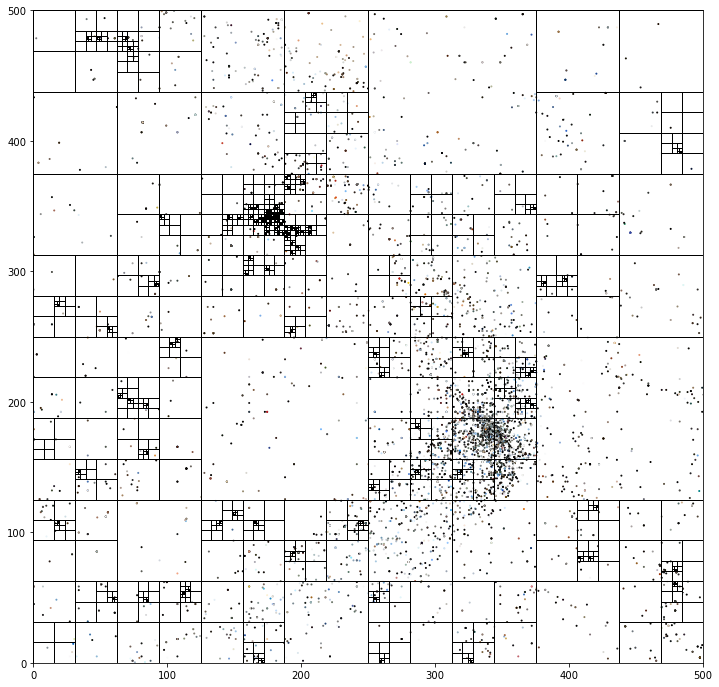

In [29]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter([p[0] for p in newPoints], [p[1] for p in newPoints], c = colours/255.0, s = 1)
for b in blocks:
    ax.add_patch(Rectangle((b[0][1],b[0][0]), b[1][1], b[1][0],
                           edgecolor = 'black',
                           fill=False,lw=1))
plt.ylim([0, 500])
plt.xlim([0, 500])
plt.show()

In [30]:
blocks.sort(key = lambda x:x[1][0]*x[1][1], reverse = True)

In [31]:
def sharesBorder(s1, s2):
    s1lim = [s1[0][0], s1[0][1], s1[0][0]+s1[1][0], s1[0][1]+s1[1][1]]
    s2lim = [s2[0][0], s2[0][1], s2[0][0]+s2[1][0], s2[0][1]+s2[1][1]]
    
    lBorders = [[(s1lim[0], s1lim[1]), (s1lim[2], s1lim[1])],
                [(s1lim[0], s1lim[3]), (s1lim[2], s1lim[3])],
                [(s1lim[0], s1lim[1]), (s1lim[0], s1lim[3])],
                [(s1lim[2], s1lim[1]), (s1lim[2], s1lim[3])]
                ]
    rBorders = [[(s2lim[0], s2lim[1]), (s2lim[2], s2lim[1])],
                [(s2lim[0], s2lim[3]), (s2lim[2], s2lim[3])],
                [(s2lim[0], s2lim[1]), (s2lim[0], s2lim[3])],
                [(s2lim[2], s2lim[1]), (s2lim[2], s2lim[3])]
                ]

    for lb in lBorders:
        for rb in rBorders:
            if checkOverlap(lb, rb):
                return True

def checkOverlap(a, b):
    if a[0][0] == b[0][0] == a[1][0] == b[1][0]:
        return a[1][1] > b[0][1] and b[1][1] > a[0][1]
    elif a[0][1] == b[0][1] == a[1][1] == b[1][1]:
        return a[1][0] > b[0][0] and b[1][0] > a[0][0]

In [32]:
def matchDensity(b1, b2, ta = 0.18511, tc = 0.00004):
    area1 = b1[1][0]*b1[1][1]
    area2 = b2[1][0]*b2[1][1]
    if len(b1[2]) and len(b2[2]):
        d1 = (area1/len(b1[2]))*100000
        d2 = (area2/len(b2[2]))*100000

        t = ta * min(d1, d2) + tc

        if abs(d1 - d2) < t:
                return True
        else:
            return False
    elif len(b1[2]) == len(b2[2]) == 0:
            return True
    else:
        return False

In [33]:
def addToGroup(group, blocks):
    added = True
    while added:
        found = False
        for g in group:
            for b in blocks:
                if sharesBorder(g,b) and matchDensity(g,b):
                    found = True
                    group.append(b)
                    blocks.remove(b)
        added = found

In [34]:
blocks = []
unpack(squares, blocks)

In [35]:
groups = []
while len(blocks) > 0:
    group = [blocks[0]]
    blocks.remove(blocks[0])
    addToGroup(group,blocks)
    groups.append(group)  

In [36]:
print(len(groups))

715


In [37]:
print(groups[0])

[[(0, 0), (15.625, 15.625), [[10.533428059166727, 11.564297185172768]]]]


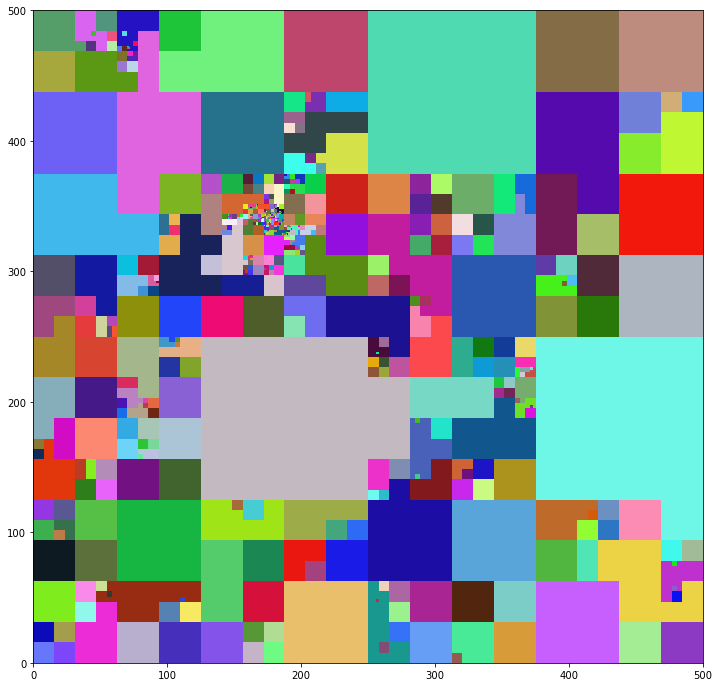

In [38]:
from matplotlib.patches import Rectangle
import random

fig, ax = plt.subplots(figsize = (12,12))
for g in groups:
    colour = np.array(random.sample(range(10, 255), 3))/255
    for b in g:
        ax.add_patch(Rectangle((b[0][1],b[0][0]), b[1][1], b[1][0],
                               facecolor = colour,
                               fill=True))
plt.ylim([0,500])
plt.xlim([0,500])
plt.show()

In [39]:
groups.sort(key = lambda x : len(x), reverse = True)

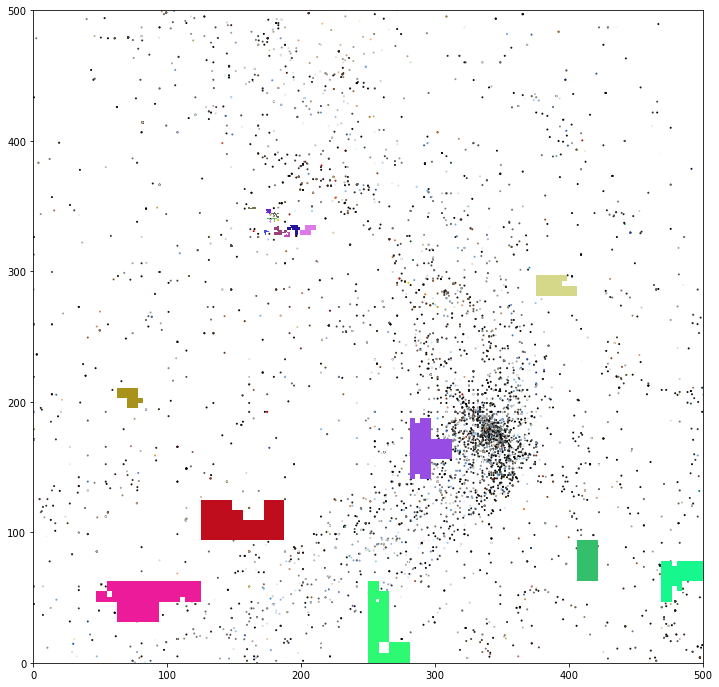

In [40]:
from matplotlib.patches import Rectangle
import random

fig, ax = plt.subplots(figsize = (12,12))

ax.scatter([p[0] for p in newPoints], [p[1] for p in newPoints], c = colours/255.0, s = 1)

for g in groups[0:20]:
    colour = np.array(random.sample(range(10, 255), 3))/255
    for b in g:
        ax.add_patch(Rectangle((b[0][1],b[0][0]), b[1][1], b[1][0],
                               facecolor = colour,
                               fill=True))



plt.ylim([0,500])
plt.xlim([0,500])
plt.show()